# Math 134A Final Review

# Chapter 2
## Present Value (PV) and Future Value (FV)
The Present Value (PV) and Future Value (FV) formulas are used to determine the current value of a cash flow or the value of a cash flow at a future date, respectively.

Let $(x_0, x_1,\ldots, x_n)$ be a cashflow where $x_k$ is the payment received at period $k$. Let $r$ be the interest rate per period, and suppose that the interest compounds per period. Then we have \
**Present Value Formula**
$$PV = \sum_0^n \frac{x_k}{(1+r)^k}$$
In Excel, we use the NPV function to do computation. 

For the continuous compound model, if $(x_{t_0},\ldots, x_{t_n})$ is a cashflow where $x_{t_k}$ is the payment received at time $t_k$. Let $r$ be the continuously compounding interest, then 
$$PV = \sum_0^n x_{t_k}e^{-rt_k}$$

## Nominal Rate and Effective Rate
Let $r$ be the **nominal annual interest rate**. If the interest compounds $n$ times in a year (e.g. monthly compounding interest compounds 12 times in a year), then its **effective annual rate** is 
$$\left(1+\frac{r}{n}\right)^n$$
If the interest compounds continuously, then its effective annual rate is 
$$e^{r}$$

## IRR (Internal Rate of Return)
The Internal Rate of Return (IRR) is a financial metric used to evaluate the profitability of an investment or project. It is the discount rate at which the Net Present Value (NPV) of an investment or project becomes zero.

Let $(x_0,\ldots, x_n)$ be a cashflow where $x_0 < 0$. Then the irr of this cashflow is the interest rate $r$ such that the following equation holds

**IRR Equation:**
$$0 = \sum_0^n \frac{x_k}{(1+r)^n}$$
In Excel, we use the irr function to do the computation. Mathematically, we solve this using numerical methods such as Newton's method. 

# Chapter 3

## Annuity/Amortization
An annuity is a series of equal payments made at fixed intervals over a specified period of time.

A perpetual annuity has cashflow $(0, A, A, \ldots)$ where $A$ is the payment per period. Suppose that $r$ is the interest rate per period. Its present value is given by the formula

**Present Value of Perpetual Annuity**
$$P = \frac{A}{r}$$

For a finite period annuity $(0, A,A,\ldots, A)$ which end at period $n$. Suppose that $r$ is the interest rate per period. Its present value is given by the formula

**Present Value (P) of Annuity**
$$P = \frac{A}{r}\left(1-\frac{1}{(1+r)^n}\right)$$

Given the present value $P$ of the annuity (which can also be viewed as the total amount money we loaned). Suppose that the total number of periods is $n$, and the interest rate per period is $r$. Then Its per-period payment is given by the formula

**Annuity Payment Amount (A):**
$$A = \frac{rP}{1-\frac{1}{(1+r)^n}} = \frac{r(1+r)^n P}{(1+r)^n - 1}$$
In Excel, we use the PMT function to do computation.


## Bond's Price and Bond's Yield
A **bond** is an obligation by the bond issuer to pay money to the bondholder according to rules specified at the time the bond is issued. Generally, a bond pays a specific amount, its **face value** or, equivalently, its **par value** at the date of maturity. Most bonds pay periodic coupon payments, which is usually a fraction of its face value. We call the internal rate of return of bond as its **yield to maturity (YTM)**. Given the YTM of a bond, we can also compute its price by calculating the present value of the bond's payment cashflow.

Let 
- $F =$ Face value of the bond
- $C =$ Yearly coupon payment
- $m =$ Number of coupon payments per year
- $n =$ Number of coupon payments remaining
- $\lambda =$ Yield of the bond (IRR)

**Bond Price Formula**
$$P = \sum_1^n \frac{C/m}{(1+\frac{\lambda}{m})^k} + \frac{F}{(1+\frac{\lambda}{m})^n}$$

## Price - Yield Curve
- Bonds traded at par will have same YTM as coupon rate
- Higher yield bonds has a lower price
- Bonds with longer time to maturity will have larger slope (higher duration)

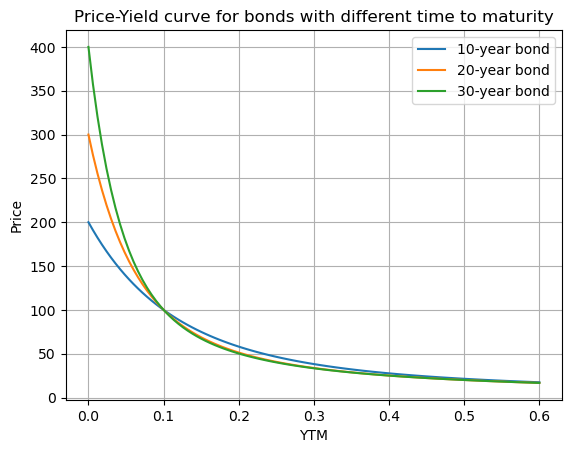

In [8]:
import math
import numpy as np
from matplotlib import pyplot as plt

def PV(r, cf): 
    dt = range(len(cf))
    pv = 0
    for k in range(0, len(cf)):
        pv += cf[k] / (1+r)**dt[k]
    return pv

# This function computes the price of a bond mature in dt years, with face value F, YTM y, and yearly coupon c paid m times every year 
def bond_price(F, y, dt, c = 0, m = 1):
    cf = [0] + [c/m] * (dt * m - 1) + [F+c/m]
    return PV(y/m, cf)

F = 100
C = 10
dt1 = 10
dt2 = 20
dt3 = 30

y_list = np.linspace(0, 0.6, 101)
price_1_list = []
price_2_list = []
price_3_list = []
for y in y_list:
    price_1_list.append(bond_price(F, y, dt1, C))
    price_2_list.append(bond_price(F, y, dt2, C))
    price_3_list.append(bond_price(F, y, dt3, C))
    
plt.plot(y_list, price_1_list, label = "10-year bond")
plt.plot(y_list, price_2_list, label = "20-year bond")
plt.plot(y_list, price_3_list, label = "30-year bond")
plt.grid()
plt.legend()
plt.title("Price-Yield curve for bonds with different time to maturity")
plt.xlabel("YTM")
plt.ylabel("Price")
plt.show()

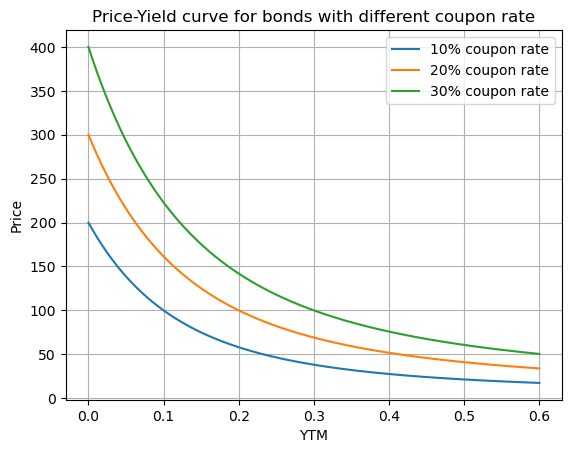

In [10]:
F = 100

C1 = 10
C2 = 20
C3 = 30
dt = 10


y_list = np.linspace(0, 0.6, 101)
price_1_list = []
price_2_list = []
price_3_list = []
for y in y_list:
    price_1_list.append(bond_price(F, y, dt, C1))
    price_2_list.append(bond_price(F, y, dt, C2))
    price_3_list.append(bond_price(F, y, dt, C3))
    
plt.plot(y_list, price_1_list, label = "10% coupon rate")
plt.plot(y_list, price_2_list, label = "20% coupon rate")
plt.plot(y_list, price_3_list, label = "30% coupon rate")
plt.grid()
plt.legend()
plt.title("Price-Yield curve for bonds with different coupon rate")
plt.xlabel("YTM")
plt.ylabel("Price")
plt.show()

## Bond's Duration
**Duration** Measures the sensitivity of the bond price to the change in the yield. 
### Macaulay Duration
The **Macaulay duration** is the weighted sum of the time that we receive each payment, where the weights are the ratio between the present value of this payment over the net present value. 

Suppose a financial instrument makes payments $m$ times per year, with the payment in period being $c_k$, and there are $n$ periods remaining. Suppose that $\lambda$ is annual interest rate, and $P$ is the present value of this cashflow. Then the Macaulay duration is defined as:
$$D = \frac{\sum_{k=1}^n \frac{k}{m}PV_k}{P} = \frac{\sum_{k=1}^n \frac{k}{m}\frac{c_k}{(1+\lambda/m)^k}}{P}$$

### Modified Duration
The **Modified duration** is computed by 
$$D_M = \frac{D}{1+\frac{\lambda}{m}}$$

We have the price-sensitivity approximation:
$$\frac{\Delta P}{P} \approx -D_M\Delta \lambda$$

### Macaulay Duration of a Portfolio
If a portfolio consists of $n$ fixed income investments with price $P_1,\ldots, P_n$, and each of them has a duration $D_1,\ldots, D_n$. Let $P = P_1+\cdots+P_n$ be the price of this portfolio, and $D$ be its duration. Then we have 
$$D = \frac{P_1}{P}D_1+\cdots+\frac{P_n}{P}D$$

## Immunization
Immunization is a technique used to structure a bond portfolio to protect against interest rate risk. The goal is to create a portfolio that can meet a series of cash obligations while minimizing the impact of changes in interest rates on the portfolio's value.

To achieve immunization, both the present value (PV) and duration (D) of the bond portfolio should be matched with the present value and duration of the liability or obligation stream. The immunized portfolio is constructed by solving the following two linear equations:
$$ \begin{align}
P_1x_1+P_2x_2  &= P \\ 
D_1P_1x_1+D_2P_2x_2 &= DP
\end{align}$$
where
- $P_1, P_2$ are the prices of bonds 1 and 2 per unit
- $D_1, D_2$ are the durations of bonds 1 and 2
- $D, P$ is the duration and present value of the liability respectively
- $x_1, x_2$ are the units of bond 1 and bond 2 that we need to purchase

# Chapter 4
## Spot Rates
Spot rates, or zero-coupon rates, are the yields on zero-coupon bonds with different maturities. Given spot rates (s_1,s_2,s_3,\ldots), the present value of a cash flow (x_0, x_1,\ldots, x_n) can be computed by 
$$PV = \sum_0^n \frac{x_k}{(1+s_k)^k}$$
If we assume continuous compounding model, then we have 
$$PV = \sum_0^n x_ke^{-ks_k}$$


## Forward Rates
Suppose that the spot rates are given by $(s_1, s_2,\ldots)$. Then the forward rate $f_{ij}$ is the interest rate for the money to be borrowed at time i until time j. It satisfies the equation 
$$(1+s_i)^i(1+f_{ij})^{j-i} = (1+s_j)^j$$
and thus 
$$f_{ij} = \left(\frac{(1+s_j)^j}{(1+s_i)^i}\right)^{\frac{1}{j-i}} - 1$$

If we assume continuous compounding model, then the forward rates satisfies 
$$e^{is_i}e^{f_{ij}(j-i)} = e^{js_j}$$
and thus
$$f_{ij} = \frac{js_j-is_i}{j-i}$$
## Immunization with Spot Rate Curves and Quasi-Modified Duration
The **quasi-modified duration** measures the sensitivity of the price to the parallel shift of spot rates. We have 
$$D_Q = \frac{1}{P} \sum_1^n \frac{k}{m}x_k\left(1+\frac{s_k}{m}\right)^{-(k+1)}$$
where
- $x_k = $ payment received in period k
- $m = $ number of periods per year
- $s_k = $ spot rates in period $k$, **quoted annually**
- $n = $ total number of periods
- $P = $ present value of this cashflow

To immunize a portfolio against parallel shifts in the spot rate curve, we need to solve the following two equations:
$$
\begin{align}
P_1x_1+P_2x_2 &= P \\
P_1D_1x_1+P_2D_2x_2 &= DP
\end{align}
$$

# Chapter 5
## Integer Linear Programing
You can use the "OpenSolver" add-on on google sheets to solve this kind of problems 

# Chapter 6
## Basics of Probability 
Let $X$ be a discrete random variable taking values $x_1,\ldots, x_k$. We define its 
- **Expected value**
$$\overline{X} = E[X] = \sum_1^n x_iP\{X = x_i\}$$
- **Variance**
$$\sigma_X^2 = \text{Var}(X) = E[(X-E[X])^2] = E[X^2] - E[X]^2$$
- **Standard Deviation**
$$\sigma_X = \sqrt{\text{Var}(X)}$$

Let $X, Y$ be two random variables. We define its 
- **Covariance**
$$\sigma_{XY} = \text{Cov}(X, Y) = E[(X-E[X])(Y-E[Y])]$$
- **Pearson Correlation Coefficient**
$$\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X\sigma_Y}$$

We have $\rho_{X,Y}\in [-1, 1]$, and $\rho_{X,Y} = \pm 1$ if and only if $X=\pm c\cdot Y$ where $c$ is a positive number.

## Properties of Covariance
The covariance is a bilinear, positive semi-definite, symmetric form (i.e, it is an inner product on random variable), satisfying the properties 
$$\text{Cov}(X, Y) = \text{Cov}(Y, X)$$
$$\text{Cov}(\sum_1^n X_i, \sum_1^nX_i) = \sum_{i,j}\text{Cov}(X_i, X_j)$$

By Cauchy-Schwarz inequality, we can show that 
$$|\text{Cov}(X,Y)|\leq \sqrt{Var(X)}\sqrt{Var(Y)}$$
and the equality holds if $Y$ is a scalar multiple of $X$. 

## Return Rate and Total Return
We consider a single-period investment, which consists of initial investment $X_0$, and final payment $X_1$. We define 
- **Total Return**
$$R = \frac{X_1}{X_0}$$
- **Return rate**
$$r = \frac{X_1-X_0}{X_0} = R-1$$

Consider a portfolio with weight $w_i$ on $n$ investments with return rates $r_1,\ldots, r_n$, then the return rates of this portfolio is 
$$r = \sum_1^n w_ir_i$$

We denote the expected value of return rate as $\overline{r}$, and its standard deviation as $\sigma$ (also called **volatility**). 

## Lagrange Multiplier Method
Let $f: \mathbb{R}^n\mapsto R$ be a continuously differentiable function that we want to optimize. Let $g_1,\ldots, g_k:\mathbb{R}^n\mapsto R$ be continuously differentiable functions such that the matrix $(\frac{\partial g_i}{\partial x_j})_{ij}$ is full rank (This condition really means that there is no redundant constraints). Then, the extrema of $f(x_1,\ldots, x_n)$ subject to $g_i(x_1,\ldots, x_n) = c_i$ for all $i$ can be found on the point satisfying the following equations 
$$\begin{cases} \nabla f = \sum_1^n \lambda_i \nabla g_i \\
 g_i(x_1,\ldots, x_n) = c_i \;\;\;\;\;\;\;\;\;\;\text{ for all } i\end{cases}$$

## Markowitz Model and Min-Variance Set
Suppose that there are $n$ assets on the market with mean rate of return $\overline{r_i}$, and variance $\sigma_i^2$. Suppose that $\sigma_{ij}$ is the covariance between asset $i$ and asset $j$. Then, the asset on the **min-variance set** with mean rate of return $\overline{r}$ satisfies the below equations 
$$\begin{cases}\sum_{j = 1}^n \sigma_{ij}w_j-\lambda\overline{r_i}-\mu = 0 \;\;\;\;\text{for all } i\\ \sum_1^n w_i\overline{r_i} = \overline{r} \\ \sum_1^n w_i = 1\end{cases}$$

## Two Funds Theorem 
Any portfolio on the min-variance set is of the form $\alpha\mathbf{w}_1+(1-\alpha)\mathbf{w}_2$ where $\mathbf{w}_1$, $\mathbf{w}_2$ are the weight vectors for two efficient portfolio and $\alpha$ is a real number. We solve their weight vectors by 
### Fund 1 (also the portfolio at the min-variance point)
$$\begin{bmatrix}\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\ \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\ \vdots & \vdots & \cdots & \vdots \\ \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}\end{bmatrix}\begin{bmatrix}v_1 \\ v_2 \\ \vdots \\ v_n\end{bmatrix}= \begin{bmatrix}1 \\ 1 \\ \vdots \\ 1\end{bmatrix}$$
Then, we normalize the $v_i$ to get the weights $w_i = \frac{v_i}{\sum_1^n v_i}$

### Fund 2
$$\begin{bmatrix}\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\ \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\ \vdots & \vdots & \cdots & \vdots \\ \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}\end{bmatrix}\begin{bmatrix}v_1 \\ v_2 \\ \vdots \\ v_n\end{bmatrix}= \begin{bmatrix}\overline{r_1} \\ \overline{r_2} \\ \vdots \\ \overline{r_n}\end{bmatrix}$$
Then, we normalize the $v_i$ to get the weights $w_i = \frac{v_i}{\sum_1^n v_i}$
## One Fund Theorem
Suppose that there is an extra risk-free asset with rate of return $r_f$. Then the efficient frontier becomes a straight line passing through the risk-free asset and a unique risky portfolio. We call that unique risky portfolio as the **one fund**. Any efficient portfolio is a combination of the one fund and the risk-free asset. The weight vector for the one-fund is solved by 
 $$\begin{bmatrix}\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\ \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\ \vdots & \vdots & \cdots & \vdots \\ \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}\end{bmatrix}\begin{bmatrix}v_1 \\ v_2 \\ \vdots \\ v_n\end{bmatrix}= \begin{bmatrix}\overline{r_1}-r_f \\ \overline{r_2}-r_f \\ \vdots \\ \overline{r_n}-r_f\end{bmatrix}$$
 Then, we normalize the $v_i$ to get the weights $w_i = \frac{v_i}{\sum_1^n v_i}$

# Chapter 7
## Market Portfolio
The market portfolio has weights in each asset being the ratio between the market capitalization of that asset and the sum of the market capitalization of all assets. The assumption for the CAPM model is that the market portfolio is efficient. In other word, it is the one fund in the one fund theorem. 

## Capital Asset Pricing Model (CAPM)
The Capital Asset Pricing Model (CAPM) is a fundamental model in financial economics that relates the risk of an investment to its expected return. The main assumption of the CAPM is that the market portfolio is the one fund of the one fund theorem. We can the describe the return of any portfolio as
$$\overline{r_i} = r_f + \beta_i(\overline{r_M}-r_f)$$
where:
- $\overline{r_i}$ is the expected return on asset ,
- $r_f$ is the risk-free rate,
- $\overline{r_M} $is the expected return on the market portfolio, and
- $\beta_i $is the beta of asset , which measures its sensitivity to the overall market returns.

## Beta
The **beta** of an asset with return rate $r_i$ is computed by 
$$\beta_i = \frac{\text{Cov}(r_i, r_M)}{\sigma_M^2}$$

### Beta of a Portfolio
Suppose that a portfolio has wight $w_i$ in asset $i$, and asset $i$ has beta $\beta_i$. Then the beta of this portfolio is 
$$\beta = \sum_1^n w_i\beta_i$$

## CAPM as pricing model
Suppose that an asset is purchased at price $P$ (which is deterministic) and latter sold at price $Q$ (which is a random variable) in the future. Then, we have $r = \frac{Q-P}{P}$, and $\overline{r} - r_f = \beta(\overline{r_M}-r_f)$. Hence, we get 
$$P = \frac{\overline{Q}}{1+\overline{r}} = \frac{\overline{Q}}{1+r_f+\beta(\overline{r_M}-r_f)}$$

## Systematic Risk vs Non-Systematic Risk
Suppose that
$$r_i = r_f+\beta_i(r_M-r_f)+\varepsilon_i$$
where $\varepsilon_i$ is some error term.  Assuming the CAPM, we have
$$\sigma_i^2 = \beta_i^2\sigma_M^2 + \text{Var}(\varepsilon)$$
We call $\beta_i^2\sigma_M^2$ as the **systematic risk**. This is the risk associated with the market as a whole. Every asset with non-zero beta contains this risk, and it cannot be reduced by diversification.

We call $\text{Var}(\varepsilon_i)$ as the **non-systematic risk**. This risk is uncorrelated with the market and can be reduced by diversification. It is specific to a particular asset or industry.

## Sample Mean and Sample Variance
Let $X$ be a random variable, and $x_1,\ldots, x_n$ be data sampled from this random variable (or equivalently, i.i.d random variables with distribution $X$). Then we define the **sample mean** (also called empirical mean) as 
$$\overline{x} = \frac{1}{n}\sum_1^n x_i$$
This is an unbiased estimator for the mean of $X$, in the sense that $E[\overline{x}] = E[X]$
We define the **sample variance** as 
$$S = \frac{1}{n-1}\sum_1^n (x_i-\overline{x})^2$$
This is an unbiased estimator for the mean of $X$, in the sense that $E[S] = \text{Var}(X)$

## Evaluation of portfolios
### Jensen's Alpha
Jensen's Alpha measures the excess return of the portfolio from what is predicted by CAPM
$$\alpha = r_p-\left(r_f+\beta_p(r_M-r_f)\right)$$
where:
- $\alpha$ is Jensen's Alpha
- $r_p$ is the realized return of the portfolio or investment
- $r_f$ is the risk-free rate
- $\beta_p$ is the portfolio's or investment's beta
- $r_M$ is the average return of the market

A positive alpha indicates that an investment has performed better than would have been expected given its beta. A negative alpha indicates the investment has underperformed, given the expectations established by CAPM.
### Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return 
$$S_P = \frac{r_P-r_f}{\sigma_P}$$
where:
- $r_P$ is the realized return of the portfolio or investment
- $r_f$ is the risk-free rate
- $\sigma_P$ is the standard deviation of the portfolio's or investment's excess return

# Chapter 8
## Factor Models
Factor models are used to quantify risk and return in a portfolio. They represent each asset's return as a linear function of one or more factors and a random error term.
### Single Factor Model
The single factor model is represented by 
$$r_i =a_i+b_if+\varepsilon_i$$
where $r_i$ is the return of asset $i$, $f$ is the factor (also called feature in machine learning), and $\varepsilon_i$ is the error term. We can compute $a_i, b_i$ via 
$$\begin{align}
\overline{r_i} = a_i+b_i\overline{f} \\
\text{Cov}(r_i, f) = b_i\text{Var}(f)
\end{align}$$

### Multi-factor Model
The multi-factor model is represented by 
$$r_i = a_i+b_{i_1}f_1+\cdots+b_{i_m}f_m\varepsilon_i$$
We can compute $a_i, b_{i1},\ldots,b_{im}$ via 
$$\begin{align}
\overline{r_i} & = a_i+b_{i1}\overline{f}_1+\cdots+b_{im}\overline{f}_m \\
\text{Cov}(r_i, f_1) &= b_{i1}\text{Var}(f_1) \\
&\vdots \\
\text{Cov}(r_i, f_m) &= b_{im}\text{Var}(f_m) 
\end{align}$$

## Arbitrage Pricing Theory (APT)
Assume that the return of each asset are governed by $r_i = a_i+b_{i1}f_1+\cdots+b_{im}f_m$ with no error term (i.e. no non-systematic risk). Then, there is $\lambda_0$ (which is the risk-free rate) and $\lambda_j$ such that 
$$\overline{r_i} = \lambda_0+\sum_1^m b_{ij}\lambda_j$$

 